In [1]:
# Titanic dataset
import pandas as pd
dataset  = pd.read_csv("titanic.csv")

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns

In [5]:
gender = dataset['Sex']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

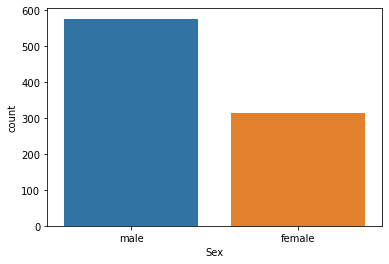

In [6]:
sns.countplot(gender)

In [7]:
survived = dataset['Survived']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

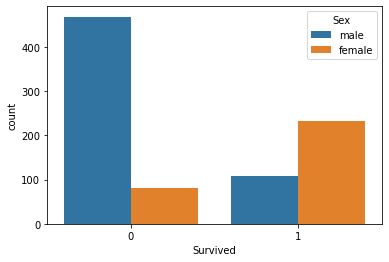

In [8]:
sns.countplot(survived,hue="Sex",data = dataset)

In [9]:
pclass = dataset['Pclass']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

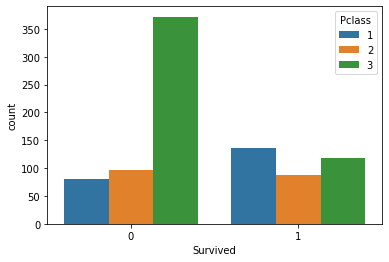

In [10]:
sns.countplot(survived,hue='Pclass',data=dataset)

In [11]:
y = dataset['Survived']

In [12]:
X = dataset[['Pclass','Sex','Age','SibSp','Parch','Cabin','Embarked']]

<AxesSubplot:>

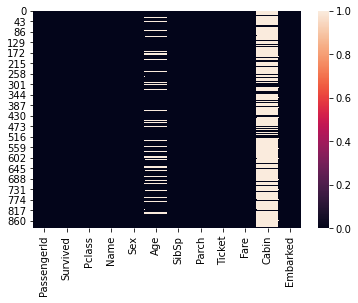

In [13]:
sns.heatmap(dataset.isnull())

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


In [15]:
X = X.drop('Cabin',axis=1)

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

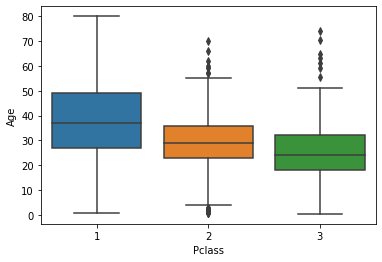

In [17]:
sns.boxplot(y="Age",x="Pclass",data=dataset)

In [18]:
def nullfill(cols):
    Pclass = cols[1]
    Age = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
        else :
            return 30
    else:
        return Age
    

In [19]:
age = dataset[['Age','Pclass']].apply(func=nullfill,axis=1)

In [20]:
X['Age'] = age

In [21]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,25.0,1,2,S
889,1,male,26.0,0,0,C


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

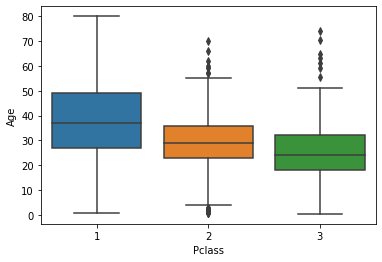

In [22]:
sns.boxplot(y="Age",x="Pclass",data=dataset)

In [23]:
gender = pd.get_dummies(gender,drop_first=True)

In [24]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [25]:
pclass = X['Pclass']

In [26]:
pclass = pd.get_dummies(pclass,drop_first=True)

In [27]:
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [28]:
SibSp = X['SibSp']

In [29]:
sibsp = pd.get_dummies(SibSp,drop_first=True)

In [30]:
sibsp

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


In [31]:
embarked = X['Embarked']

In [32]:
embarked = pd.get_dummies(embarked,drop_first=True)

In [33]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [34]:
parch = X['Parch']

In [35]:
parch = pd.get_dummies(parch,drop_first=True)

In [36]:
parch

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


In [37]:
final_dataset = pd.concat([age,pclass,gender,sibsp,embarked,parch,y],axis=1)

In [38]:
final_dataset=final_dataset.dropna()

In [39]:
X=final_dataset.iloc[:,0:-1]

In [40]:
X

,0,2,3,male,1,2,3,4,5,8,Q,S,1,2,3,4,5,6
0,22.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,38.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,35.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,35.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
887,19.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
888,25.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
889,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

<AxesSubplot:>

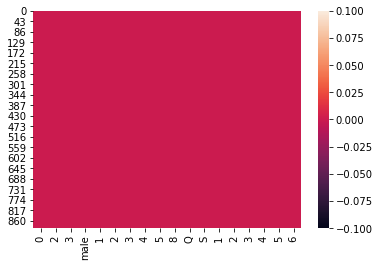

In [42]:
sns.heatmap(X.isnull())

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
model.coef_

array([[-0.02613542, -0.62335831, -1.85008045, -2.49418219,  0.07793514,
        -0.02470507, -1.1517478 , -0.6765663 , -0.61206181, -0.94880505,
        -0.1665281 , -0.53533252,  0.426763  , -0.17385888,  0.49070176,
        -0.71643131, -0.63507345, -0.33241471]])

In [47]:
y_pred = model.predict(X_test)

In [48]:
model.coef_

array([[-0.02613542, -0.62335831, -1.85008045, -2.49418219,  0.07793514,
        -0.02470507, -1.1517478 , -0.6765663 , -0.61206181, -0.94880505,
        -0.1665281 , -0.53533252,  0.426763  , -0.17385888,  0.49070176,
        -0.71643131, -0.63507345, -0.33241471]])

In [49]:
model.intercept_

array([3.29894677])